
# CPE 313 : Advanced Machine Learning with Deep Learning
## HOA 1.1 Using Tensorflow with a Real Dataset

*   Name: Mogate, Ma. jenica Rose  

---



# Linear Regression with a Real Dataset

This Colab uses a real dataset to predict the prices of houses in California.   






## Learning Objectives:

After doing this Colab, you'll know how to do the following:

* Demonstrate csv file manipulation using Pandas.
* Examine a given data.
* Experiment with different features in building a model.
* Demonstrate tuning a model's hyperparameters.

## The Dataset
  
The [dataset for this exercise](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California. The dataset is old but still provides a great opportunity to learn about machine learning programming.

## Import relevant modules

The following hidden code cell imports the necessary code to run the code in the rest of this Colaboratory.

In [ ]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## The dataset

Datasets are often stored on disk or at a URL in [.csv format](https://wikipedia.org/wiki/Comma-separated_values).

A well-formed .csv file contains column names in the first row, followed by many rows of data.  A comma divides each value in each row. For example, here are the first five rows of the .csv file holding the California Housing Dataset:

```
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
```



### Load the .csv file into a pandas DataFrame

This Colab, like many machine learning programs, gathers the .csv file and stores the data in memory as a pandas Dataframe.  Pandas is an open source Python library.  The primary datatype in pandas is a DataFrame.  You can imagine a pandas DataFrame as a spreadsheet in which each row is identified by a number and each column by a name. Pandas is itself built on another open source Python library called NumPy. If you aren't familiar with these technologies, please view these two quick tutorials:

*   [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=numpy_tf2-colab&hl=en)
*   [Pandas DataFrames](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en)

The following code cell imports the .csv file into a pandas DataFrame and scales the values in the label (`median_house_value`):

In [ ]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


Scaling `median_house_value` puts the value of each house in units of thousands. Scaling will keep loss values and learning rates in a friendlier range.  

Although scaling a label is usually *not* essential, scaling features in a multi-feature model usually *is* essential.

## Examine the dataset

A large part of most machine learning projects is getting to know your data. The pandas API provides a `describe` function that outputs the following statistics about every column in the DataFrame:

* `count`, which is the number of rows in that column. Ideally, `count` contains the same value for every column.

* `mean` and `std`, which contain the mean and standard deviation of the values in each column.

* `min` and `max`, which contain the lowest and highest values in each column.

* `25%`, `50%`, `75%`, which contain various [quantiles](https://developers.google.com/machine-learning/glossary/#quantile).

In [ ]:
# Get statistics on the dataset.
training_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


### Task 1: Identify anomalies in the dataset

Do you see any anomalies (strange values) in the data?

The max values are far from the percentages shown above

In [ ]:
#@title Double-click to view a possible answer.

# The maximum value (max) of several columns seems very
# high compared to the other quantiles. For example,
# example the total_rooms column. Given the quantile
# values (25%, 50%, and 75%), you might expect the
# max value of total_rooms to be approximately
# 5,000 or possibly 10,000. However, the max value
# is actually 37,937.

# When you see anomalies in a column, become more careful
# about using that column as a feature. That said,
# anomalies in potential features sometimes mirror
# anomalies in the label, which could make the column
# be (or seem to be) a powerful feature.
# Also, as you will see later in the course, you
# might be able to represent (pre-process) raw data
# in order to make columns into useful features.

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds a randomly-initialized model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass.

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the following headline to see the code that builds and trains a model.

In [ ]:
def build_model(my_learning_rate):

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, epochs, batch_size):

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch

  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


## Define plotting functions

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) functions create the following plots:

*  a scatter plot of the feature vs. the label, and a line showing the output of the trained model
*  a loss curve

You may optionally double-click the headline to see the matplotlib code, but note that writing matplotlib code is not an important part of learning ML programming.

In [ ]:
def plotted_model(trained_weight, trained_bias, feature, label):

  plt.xlabel(feature)
  plt.ylabel(label)

  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  plt.show()


def plotted_loss_curve(epochs, rmse):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()


## Call the model functions

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use `total_rooms` as that feature.


Epoch 1/30
567/567 [==============================] - 1s 1ms/step - loss: 674917.9375 - root_mean_squared_error: 821.5339
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 27698.5020 - root_mean_squared_error: 166.4287
Epoch 3/30
567/567 [==============================] - 1s 1ms/step - loss: 26984.3320 - root_mean_squared_error: 164.2691
Epoch 4/30
567/567 [==============================] - 1s 1ms/step - loss: 26243.3613 - root_mean_squared_error: 161.9980
Epoch 5/30
567/567 [==============================] - 1s 1ms/step - loss: 25462.3438 - root_mean_squared_error: 159.5692
Epoch 6/30
567/567 [==============================] - 1s 1ms/step - loss: 24812.1523 - root_mean_squared_error: 157.5187
Epoch 7/30
567/567 [==============================] - 1s 2ms/step - loss: 24397.7500 - root_mean_squared_error: 156.1978
Epoch 8/30
567/567 [==============================] - 1s 2ms/step - loss: 23721.6875 - root_mean_squared_error: 154.0185
Epoch 9/30
567/567 [===========

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


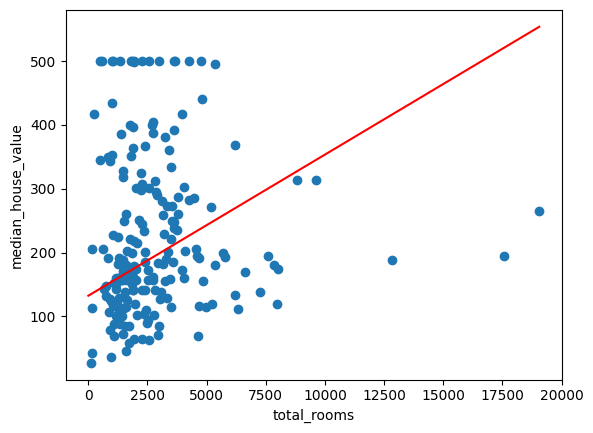

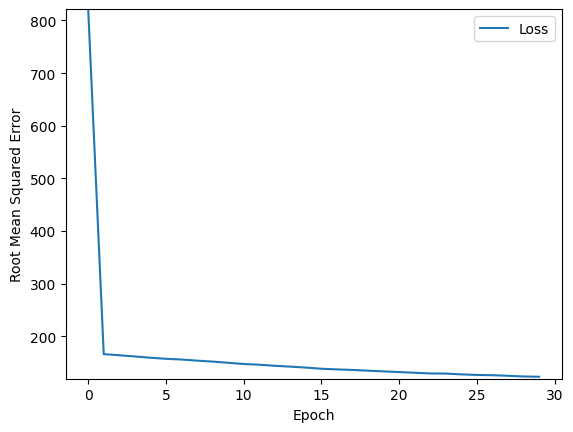

In [ ]:
learning_rate = 0.01
epochs = 30
batch_size = 30

feature = "total_rooms"

model = None

model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, training_df, feature, label, epochs, batch_size)

print("The learned weight is %.4f" % weight)
print("\nThe learned bias is %.4f\n" % bias )

plotted_model(weight, bias, my_feature, my_label)
plotted_loss_curve(epochs, rmse)


A certain amount of randomness plays into training a model. Consequently, you'll get different results each time you train the model. That said, given the dataset and the hyperparameters, the trained model will generally do a poor job describing the feature's relation to the label.

## Use the model to make predictions

You can use the trained model to make predictions. In practice, [you should make predictions on examples that are not used in training](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). However, for this exercise, you'll just work with a subset of the same training dataset. A later Colab exercise will explore ways to make predictions on examples not used in training.

First, run the following code to define the house prediction function:

In [ ]:
def House_values(n, feature, label):

  batch = training_df[feature][10000:10000 + n]
  predicted_values = model.predict_on_batch(x=batch)

  print("feature\tlabel\t\tpredicted")

  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i], training_df[label][10000 + i], predicted_values[i][0] ))

Now, invoke the house prediction function on 10 examples:

In [ ]:
House_values(10, feature, label)

feature	label		predicted
 1960     53             192
 3400     92             236
 3677     69             245
 2202     62             200
 2403     80             206
 5652    295             305
 3318    500             234
 2552    342             210
 1364    118             174
 3468    128             238


### Task 2: Judge the predictive power of the model

Look at the preceding table. How close is the predicted value to the label value?  In other words, does your model accurately predict house values?  

The predicted values is quite far from the labeled value. The model does not accurately predict house values.

## Task 3: Try a different feature

The `total_rooms` feature had only a little predictive power. Would a different feature have greater predictive power?  Try using `population` as the feature instead of `total_rooms`.

Note: When you change features, you might also need to change the hyperparameters.

Epoch 1/5
1700/1700 [==============================] - 3s 2ms/step - loss: 3026636.5000 - root_mean_squared_error: 1739.7231
Epoch 2/5
1700/1700 [==============================] - 2s 1ms/step - loss: 2814907.0000 - root_mean_squared_error: 1677.7684
Epoch 3/5
1700/1700 [==============================] - 3s 2ms/step - loss: 2750771.0000 - root_mean_squared_error: 1658.5448
Epoch 4/5
1700/1700 [==============================] - 4s 2ms/step - loss: 2721400.5000 - root_mean_squared_error: 1649.6667
Epoch 5/5
1700/1700 [==============================] - 2s 1ms/step - loss: 2827532.5000 - root_mean_squared_error: 1681.5269


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


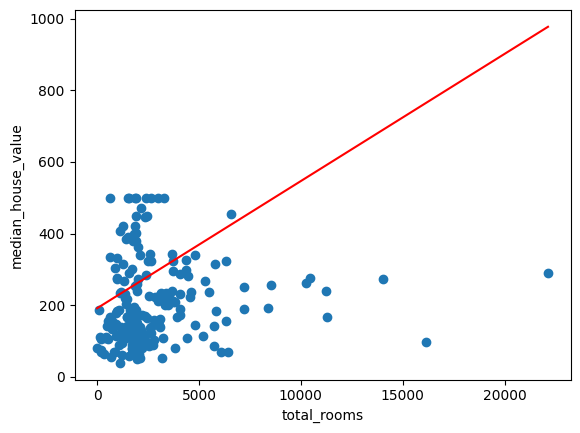

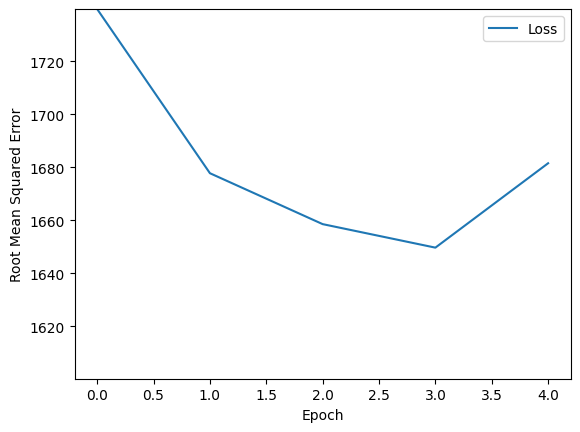

feature	label		predicted
 1960     53             261
 3400     92             312
 3677     69             322
 2202     62             270
 2403     80             277
 5652    295             392
 3318    500             309
 2552    342             282
 1364    118             240
 3468    128             315


In [ ]:
feature = "total_rooms"

learning_rate = 1
epochs = 5
batch_size = 10

model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, training_df, feature, label, epochs, batch_size)
plotted_model(weight, bias, feature, label)
plotted_loss_curve(epochs, rmse)

House_values(10, feature, label)

Epoch 1/5
1700/1700 [==============================] - 3s 1ms/step - loss: 818055.1875 - root_mean_squared_error: 904.4641
Epoch 2/5
1700/1700 [==============================] - 2s 1ms/step - loss: 798117.3125 - root_mean_squared_error: 893.3741
Epoch 3/5
1700/1700 [==============================] - 2s 1ms/step - loss: 867369.1250 - root_mean_squared_error: 931.3265
Epoch 4/5
1700/1700 [==============================] - 3s 2ms/step - loss: 896424.6250 - root_mean_squared_error: 946.7971
Epoch 5/5
1700/1700 [==============================] - 3s 2ms/step - loss: 936272.8750 - root_mean_squared_error: 967.6119


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


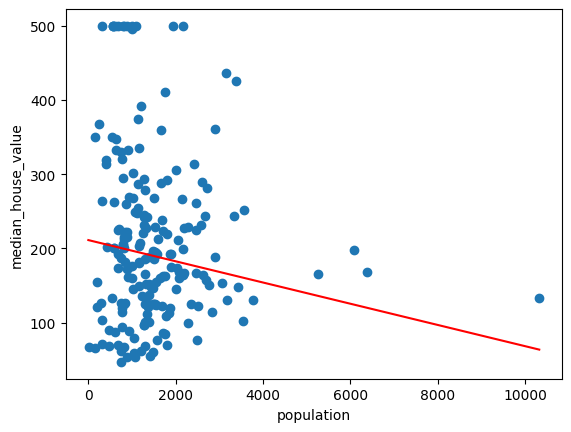

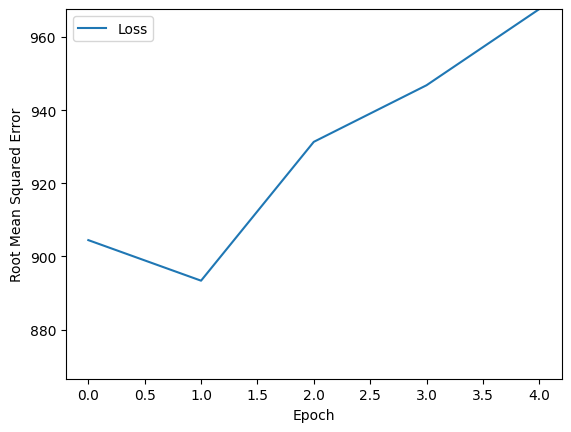

feature	label		predicted
 1286     53             193
 1867     92             184
 2191     69             180
 1052     62             196
 1647     80             188
 2312    295             178
 1604    500             188
 1066    342             196
  338    118             206
 1604    128             188


In [ ]:
feature = "population"

learning_rate = 1
epochs = 5
batch_size = 10

model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, training_df, feature, label, epochs, batch_size)

plotted_model(weight, bias, feature, label)
plotted_loss_curve(epochs, rmse)

House_values(10, feature, label)

Did `population` produce better predictions than `total_rooms`?

They both did not produce good results but comparing the two. Population has nearer predicted values than total_rooms.

## Task 4: Define a synthetic feature

You have determined that `total_rooms` and `population` were not useful features.  That is, neither the total number of rooms in a neighborhood nor the neighborhood's population successfully predicted the median house price of that neighborhood. Perhaps though, the *ratio* of `total_rooms` to `population` might have some predictive power. That is, perhaps block density relates to median house value.

To explore this hypothesis, do the following:

1. Create a [synthetic feature](https://developers.google.com/machine-learning/glossary/#synthetic_feature) that's a ratio of `total_rooms` to `population`. (If you are new to pandas DataFrames, please study the [Pandas DataFrame Ultraquick Tutorial](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en).)
2. Tune the three hyperparameters.
3. Determine whether this synthetic feature produces
   a lower loss value than any of the single features you
   tried earlier in this exercise.

Epoch 1/5
850/850 [==============================] - 1s 1ms/step - loss: 51944.4688 - root_mean_squared_error: 227.9133
Epoch 2/5
850/850 [==============================] - 1s 1ms/step - loss: 42530.1680 - root_mean_squared_error: 206.2284
Epoch 3/5
850/850 [==============================] - 2s 2ms/step - loss: 34644.2695 - root_mean_squared_error: 186.1297
Epoch 4/5
850/850 [==============================] - 2s 2ms/step - loss: 28354.6406 - root_mean_squared_error: 168.3884
Epoch 5/5
850/850 [==============================] - 1s 2ms/step - loss: 23511.3027 - root_mean_squared_error: 153.3340


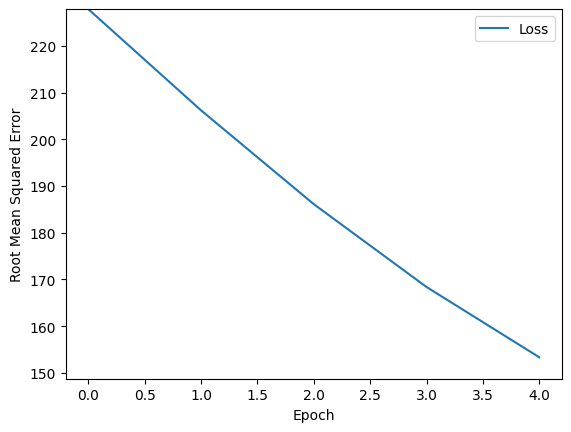

feature	label		predicted
    2     53              99
    2     92             110
    2     69             105
    2     62             121
    1     80              97
    2    295             134
    2    500             120
    2    342             132
    4    118             194
    2    128             123


In [ ]:
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
feature = "rooms_per_person"

learning_rate = 0.01
epochs = 5
batch_size = 20

model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(model, training_df, feature, label, epochs, batch_size)

plotted_loss_curve(epochs, mae)
House_values(10, feature, label)

Based on the loss values, this synthetic feature produces a better model than the individual features you tried in Task 2 and Task 3. However, the model still isn't creating great predictions.


## Task 5. Find feature(s) whose raw values correlate with the label

So far, we've relied on trial-and-error to identify possible features for the model.  Let's rely on statistics instead.

A **correlation matrix** indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

  * `1.0`: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * `-1.0`: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
  * `0.0`: no correlation; the two columns [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [ ]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


The correlation matrix shows nine potential features (including a synthetic
feature) and one label (`median_house_value`).  A strong negative correlation or strong positive correlation with the label suggests a potentially good feature.  

**Your Task:** Determine which of the nine potential features appears to be the best candidate for a feature?

In [ ]:
training_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_person'],
      dtype='object')

Epoch 1/5
1700/1700 [==============================] - 4s 2ms/step - loss: 137796.2031 - root_mean_squared_error: 371.2091
Epoch 2/5
1700/1700 [==============================] - 3s 2ms/step - loss: 131002.8203 - root_mean_squared_error: 361.9431
Epoch 3/5
1700/1700 [==============================] - 2s 1ms/step - loss: 132346.5781 - root_mean_squared_error: 363.7947
Epoch 4/5
1700/1700 [==============================] - 2s 1ms/step - loss: 126054.4297 - root_mean_squared_error: 355.0414
Epoch 5/5
1700/1700 [==============================] - 2s 1ms/step - loss: 130250.4375 - root_mean_squared_error: 360.9023


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


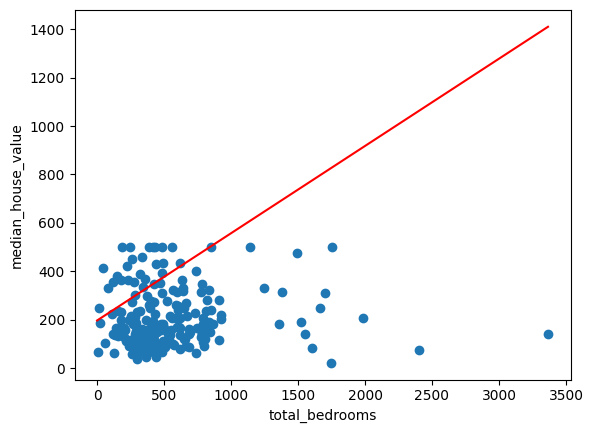

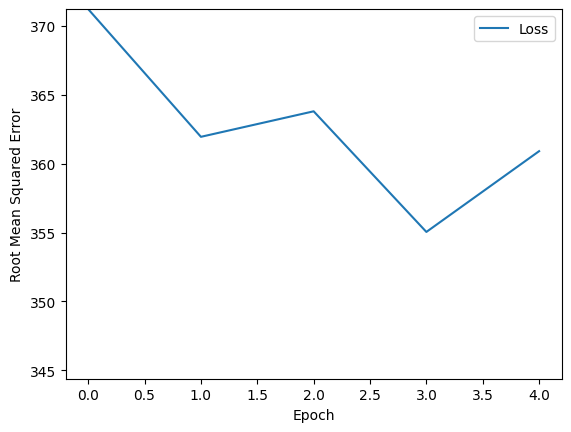

feature	label		predicted
  393     53             339
  618     92             420
  863     69             508
  471     62             367
  483     80             371
 1313    295             670
  441    500             356
  443    342             357
  282    118             299
  675    128             440


In [ ]:
feature = "total_bedrooms"

learning_rate = 1
epochs = 5
batch_size = 10

model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, training_df, feature, label, epochs, batch_size)

plotted_model(weight, bias, feature, label)
plotted_loss_curve(epochs, rmse)

House_values(10, feature, label)

Epoch 1/5
1700/1700 [==============================] - 4s 2ms/step - loss: 12610.6367 - root_mean_squared_error: 112.2971
Epoch 2/5
1700/1700 [==============================] - 2s 1ms/step - loss: 12604.1006 - root_mean_squared_error: 112.2680
Epoch 3/5
1700/1700 [==============================] - 3s 2ms/step - loss: 12523.7930 - root_mean_squared_error: 111.9098
Epoch 4/5
1700/1700 [==============================] - 2s 1ms/step - loss: 12505.4863 - root_mean_squared_error: 111.8279
Epoch 5/5
1700/1700 [==============================] - 3s 2ms/step - loss: 12895.3877 - root_mean_squared_error: 113.5579


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


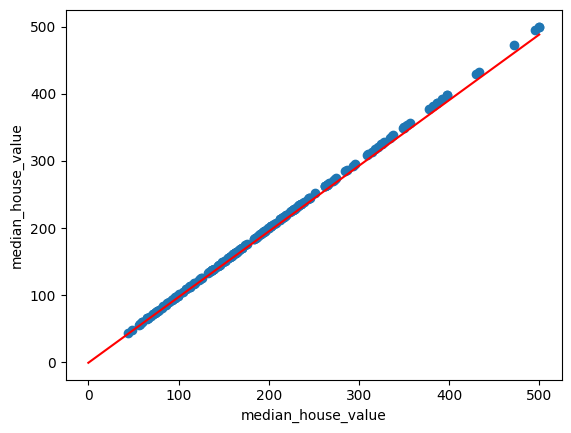

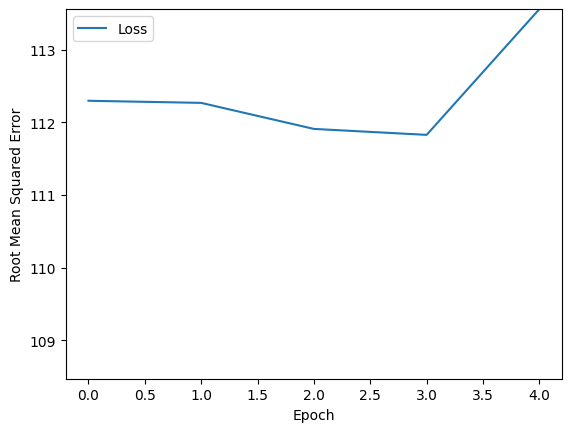

feature	label		predicted
   53     53              51
   92     92              90
   69     69              67
   62     62              60
   80     80              77
  295    295             288
  500    500             488
  342    342             334
  118    118             114
  128    128             125


In [ ]:
feature = "median_house_value"

learning_rate = 1
epochs = 5
batch_size = 10

model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, training_df, feature, label, epochs, batch_size)

plotted_model(weight, bias, feature, label)
plotted_loss_curve(epochs, rmse)

House_values(10, feature, label)

Epoch 1/5
1700/1700 [==============================] - 4s 2ms/step - loss: 7385.2095 - root_mean_squared_error: 85.9372
Epoch 2/5
1700/1700 [==============================] - 2s 1ms/step - loss: 7090.3833 - root_mean_squared_error: 84.2044
Epoch 3/5
1700/1700 [==============================] - 3s 1ms/step - loss: 7085.1147 - root_mean_squared_error: 84.1731
Epoch 4/5
1700/1700 [==============================] - 3s 2ms/step - loss: 7096.0049 - root_mean_squared_error: 84.2378
Epoch 5/5
1700/1700 [==============================] - 3s 2ms/step - loss: 7087.6255 - root_mean_squared_error: 84.1880


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


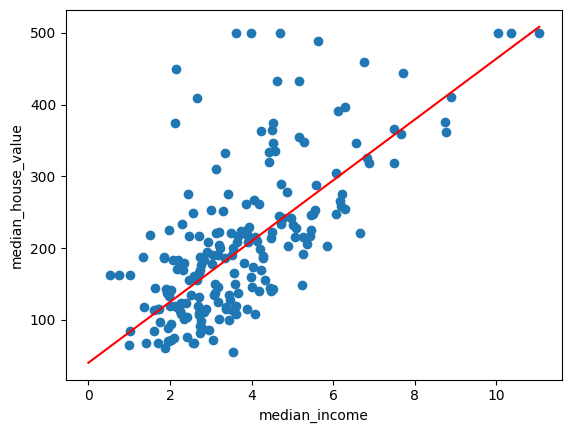

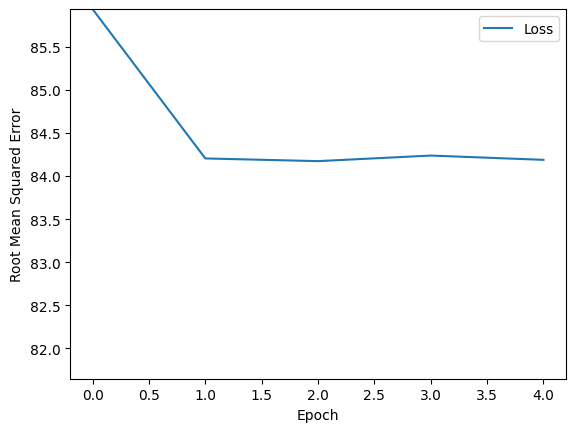

feature	label		predicted
    2     53             131
    4     92             209
    3     69             151
    2     62             129
    3     80             151
    2    295             145
   10    500             455
    5    342             258
    2    118             144
    4    128             219


In [ ]:
feature = "median_income"

learning_rate = 1
epochs = 5
batch_size = 10

model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, training_df, feature, label, epochs, batch_size)

plotted_model(weight, bias, feature, label)
plotted_loss_curve(epochs, rmse)

House_values(10, feature, label)

Based on the tested columns above, median_home_value is the best feature to be used. because the model can predict the value near to the labeled value. The parameters used are learning_rate = 1, epochs = 5, and batch_size = 10. 10 examples are used for all the features tested.

Correlation matrices don't tell the entire story. In later exercises, you'll find additional ways to unlock predictive power from potential features.

**Note:** Using `median_income` as a feature may raise some ethical and fairness
issues. Towards the end of the course, we'll explore ethical and fairness issues.

CONCLUSION: This Hands on Activity allowed me experiment with the training of the data. I was able to differentiate the outcomes of different features that were tested using the parameters shown above.